In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.sys.path.append('../')
from metrics import norm_err


In [2]:
test_data_path = './ribench_sample_v2/'
prediction_path = './refineR_predictions_v2/'


In [3]:
# load test data
test_x = pickle.load(open(test_data_path+'x.pkl', 'rb'))
test_y = np.array(pickle.load(open(test_data_path+'y.pkl', 'rb')))
# load test file list
test_files = pickle.load(open(test_data_path+'files.pkl', 'rb'))
test_files = np.array([i.split('/')[-1] for i in test_files])
test_analytes = np.array([i.split('_')[1] for i in test_files])

test_p = []
completed = []
for c,i in enumerate(test_files):
    if os.path.exists(prediction_path+i):
        completed.append(i)
        test_p.append(pd.read_csv(prediction_path+i).PointEst.values)
            

In [4]:
test_p = np.array(test_p)
test_y = np.array(test_y)
test_files = np.array(test_files)
test_analytes = np.array(test_analytes)


In [5]:
# filter test data variables for only completed predictions
idx_complete = np.array([i in completed for i in test_files])
test_x = [test_x[i] for i in np.where(idx_complete)[0]]
test_y = test_y[idx_complete]
test_files = test_files[idx_complete]
test_analytes = test_analytes[idx_complete]


In [6]:
test_p.shape


(1000, 2)

In [7]:
test_y.shape


(1000, 2)

In [8]:
errors = [norm_err(i, j) for i,j in zip(test_y, test_p)]
errors = np.array(errors)


In [9]:
np.mean(errors)


0.07304888019018782

In [10]:
np.median(errors)


0.039964593039945664

In [11]:
error_threshold = 0.2
len(np.where(errors<=error_threshold)[0])/len(errors)


0.91

In [12]:
error_threshold = 0.1
len(np.where(errors<=error_threshold)[0])/len(errors)


0.749

In [13]:
analyte_order = ['Hb','Ca','FT4','AST','LACT','GGT','TSH','IgE']
df = pd.DataFrame({
    'Mean Err': [np.mean(errors[np.where(test_analytes==i)[0]]) for i in analyte_order],
    'Median Err': [np.median(errors[np.where(test_analytes==i)[0]]) for i in analyte_order],
    'Accuracy': [len(np.where(errors[np.where(test_analytes==i)[0]]<=0.1)[0])/len(np.where(test_analytes==i)[0]) for i in analyte_order]
}, index=analyte_order)

df


,Mean Err,Median Err,Accuracy
Hb,0.063136,0.037121,0.822581
Ca,0.040720,0.027252,0.883212
FT4,0.063727,0.041058,0.823529
AST,0.064039,0.040559,0.818898
LACT,0.062477,0.036060,0.771654
GGT,0.105630,0.058323,0.630769
TSH,0.065674,0.037499,0.745902
IgE,0.117018,0.088896,0.511450


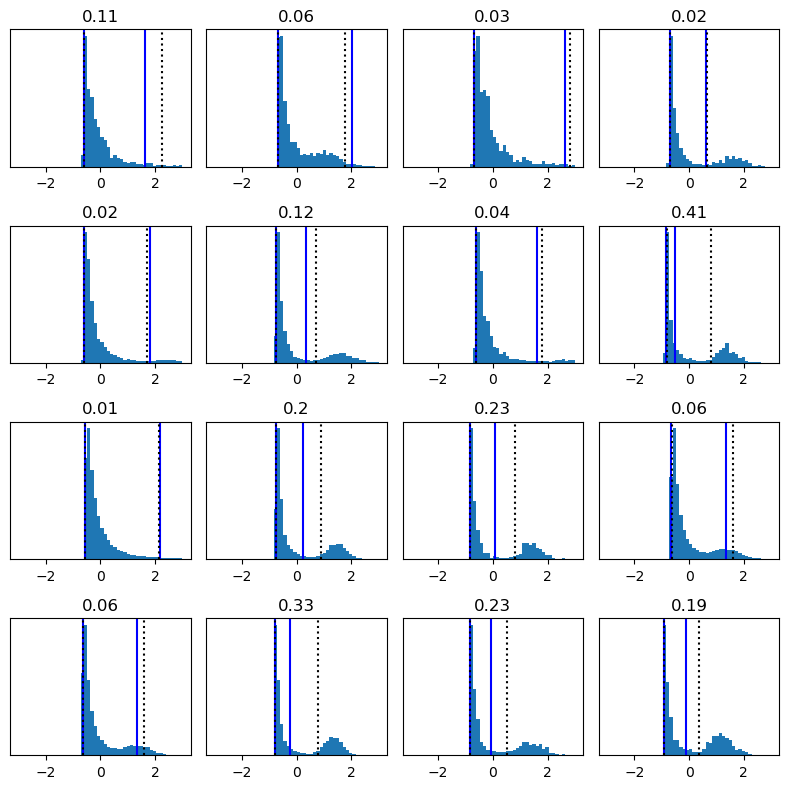

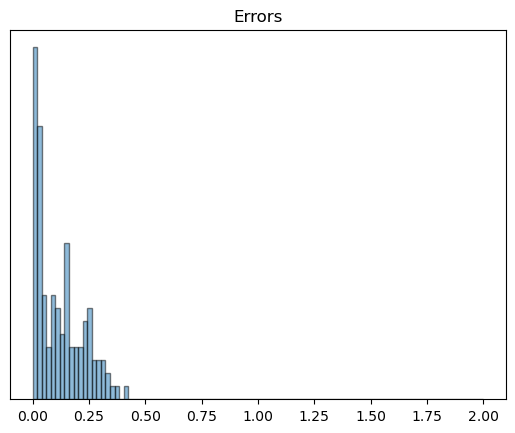

In [14]:
nr = 4
nc = 4
# idx = np.random.choice(len(test_x), nr*nc)
check_analyte = 'IgE'
idx = np.where(test_analytes==check_analyte)[0]
idx = np.random.choice(idx, nr*nc)
# idx = np.random.choice(idx[np.where(errors[idx]>0.10)[0]], nr*nc)
plt.figure(figsize=(8, 8))
for c,i in enumerate(idx):
    plt.subplot(nr, nc, c+1)
    temp_p = (test_p[i]-test_x[i].mean())/test_x[i].std()
    temp_y = (test_y[i]-test_x[i].mean())/test_x[i].std()
    temp_data = (test_x[i]-test_x[i].mean())/test_x[i].std()
    plt.hist(temp_data, np.linspace(-3, 3, 51), density=True);
    for j in temp_p:
        plt.axvline(j, c='b')
    for j in temp_y:
        plt.axvline(j, c='k', linestyle=':')
    plt.yticks([])
    plt.title(round(errors[i], 2))
plt.tight_layout()
plt.figure()
plt.hist(errors[np.where(test_analytes==check_analyte)[0]], np.linspace(0, 2, 100), edgecolor='k', alpha=0.5);
plt.yticks([])
plt.title('Errors');
